In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

from matplotlib import rc
# Enable LaTeX for text rendering
rc('text', usetex=True)
rc('text.latex', preamble="\\usepackage{siunitx}")

In [2]:
initial = np.array([
0.333, 0.56, 0.463, 0.362, 0.365, 0.389, 0.488, 0.43, 0.512, 0.285, 0.385
])

rebound = np.array([
0.154, 0.25, 0.209, 0.173, 0.17, 0.182, 0.229, 0.197, 0.237, 0.132, 0.171
])

initial_sqrt = np.sqrt(initial)
rebound_sqrt = np.sqrt(rebound)
x = initial_sqrt
y = rebound_sqrt

corr, _ = pearsonr(x, y)

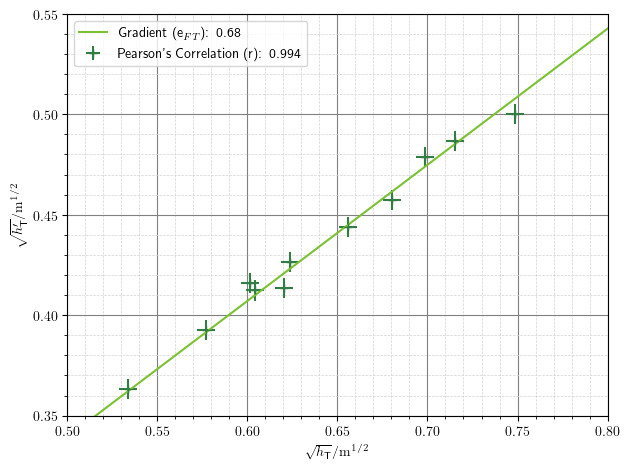

In [3]:
xlims = (0.5, 0.8)
ylims = (0.35, 0.55)

cross_colour = '#317d44'
line_colour = '#7bc133'

xerror = 0.005
yerror = 0.005

plt.errorbar(x, y, xerr=xerror, yerr=yerror, fmt='+', color=cross_colour, label = f'Pearson\'s Correlation (r): {round(corr, 3)}')


plt.xlabel(r'$\sqrt{h_{\text{T}}} / \si{\metre^{1/2}}$')
plt.ylabel(r"$\sqrt{h_{\text{T}}'} / \si{\metre^{1/2}}$")

# Calculate the slope of the trendline passing through the origin
slope = np.sum(x * y) / np.sum(x * x)

# Generate trendline values
trendline_x = np.linspace(0, 1, 100)
trendline_y = slope * trendline_x

# Plot the trendline
plt.plot(trendline_x, trendline_y, color=line_colour, label = f"Gradient (e$_{{FT}}$): {round(slope, 2)}")

# Set the scales of both axes
plt.xlim(xlims)
plt.ylim(ylims)

x_tick_positions = np.arange(xlims[0], xlims[1], 0.05)
plt.xticks(x_tick_positions)

y_tick_positions = np.arange(ylims[0], ylims[1], 0.05)
plt.yticks(y_tick_positions)

# Add gridlines
plt.grid(which='major', color='gray', linestyle='-', linewidth=0.8)  # Major gridlines
plt.minorticks_on()  # Enable minor ticks
plt.grid(which='minor', color='lightgray', linestyle='--', linewidth=0.5)  # Minor gridlines

# Minor ticks will automatically appear halfway between major ticks


plt.legend()
# plt.figure(dpi=600)


plt.tight_layout()

plt.savefig(r"C:\Coding\practical-project-25\graphs\COR/eFT.png", dpi=600)

plt.show()